In [1]:
import sys
import os
script_path = os.path.abspath('')
module_path = script_path[:script_path.rfind('src')]+ 'src' + '/'
sys.path.append(module_path)
from utils.Helper_functions import *
from compression.loadData import LoadData
from scipy import signal 
from scipy import ndimage
import matplotlib.pyplot as plt

Loading BokehJS ...

In [89]:
loadData = LoadData()
loadData.loadVideoPixelData('/Users/zhouhang/Project/Chirp-EE123/asset/Andy_Video.png')
data_stack = loadData.image_stack
print(data_stack.shape)

(7, 168, 400, 3)


## compression code start here

In [90]:
pixData = data_stack
a = pixData.shape
type(a)
print(len(a))

4


In [91]:
pixData.shape[0]

7

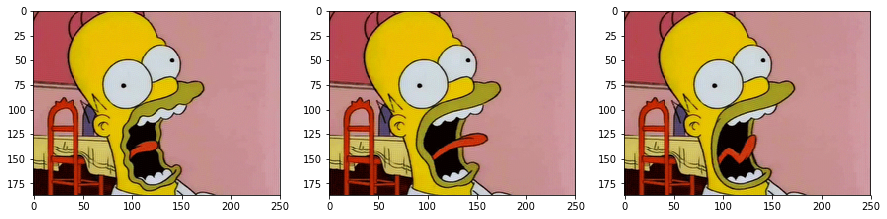

In [92]:
Tiff_show('/Users/zhouhang/Project/Chirp-EE123/asset/simpson/')

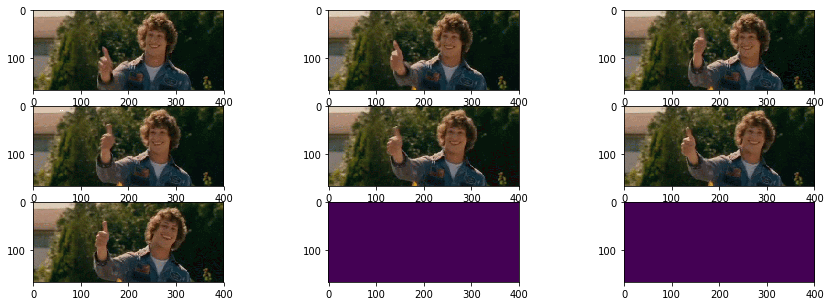

In [93]:
npArray_show(pixData)

(7, 168, 400, 4)
uint8


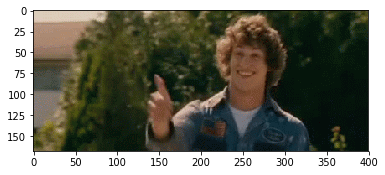

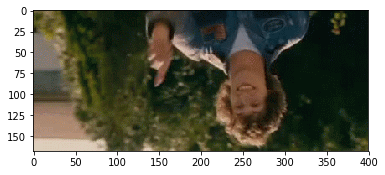

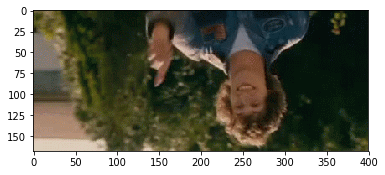

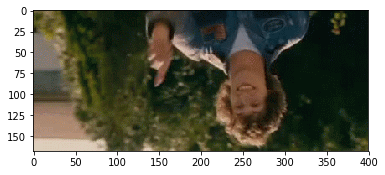

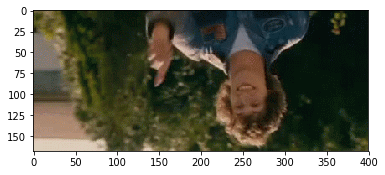

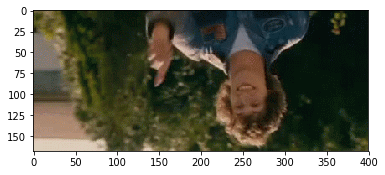

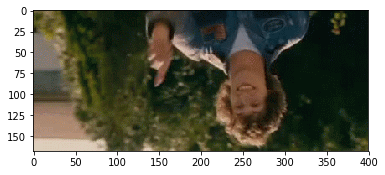

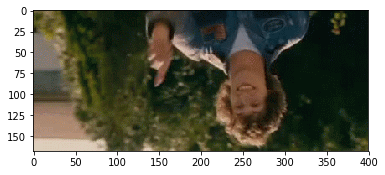

In [94]:
def Tiff_play(path, display_size = 500, frame_rate = 2):
    image_files = sorted(glob.glob(path+"*.tiff"), key=numericalSort)
    Nframe = len(image_files)

    im = Image.open(image_files[0])
    xdim, ydim= im.size
    display_array = np.zeros((Nframe,ydim,xdim,4),dtype='uint8')
    
    # load image stack
    for i in range(0,Nframe):
        im = Image.open(image_files[i])
        im = im.convert("RGBA")
        imarray = np.array(im)
        if i == 0:
            plt.imshow(imarray)
        display_array[i] = np.flipud(imarray)
        plt.figure()
        plt.imshow(display_array[0])


        
        
#     plt.imshow(display_array[0])
    print(display_array.shape)
    print(display_array.dtype)
        
    
    # Play video

    wait_time = 1/frame_rate
    normalized_size = display_size
    max_size = np.maximum(xdim,ydim)
    width = (xdim/max_size * normalized_size).astype('int')
    height = (ydim/max_size * normalized_size).astype('int')
    
    counter = 0
    first_round = True
    try:
        while True:
            if counter == 0 and first_round:
                p = bk.figure(x_range=(0,xdim), y_range=(0,ydim), plot_height = height, plot_width = width)
                p.image_rgba(image=[display_array[counter]], x=0, y=0, dw=xdim, dh=ydim, name='video')
                bk.show(p, notebook_handle=True)
                counter += 1
                first_round = False
            else:
                renderer = p.select(dict(name='video', type=GlyphRenderer))
                source = renderer[0].data_source
                source.data['image'] = [display_array[counter]]
                push_notebook()
                if counter == Nframe-1:
                    counter = 0
                else:
                    counter += 1
            time.sleep(wait_time)
            
    except KeyboardInterrupt:
        pass
    
Tiff_play('/Users/zhouhang/Project/Chirp-EE123/asset/Andy_Video/', 1000)

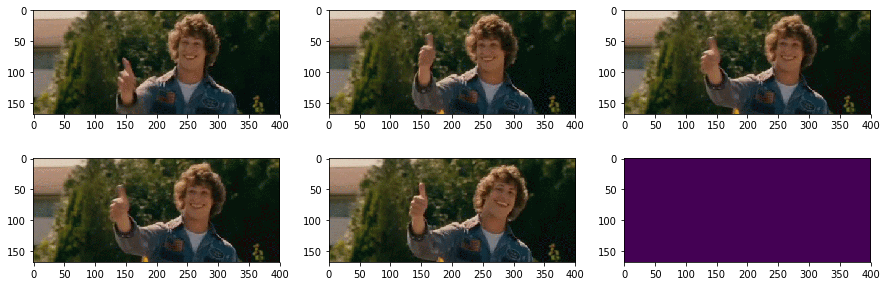

In [95]:
data = pixData
frames = data.shape[0]
height= data.shape[1]
width = data.shape[2]
channels = data.shape[3]

h_t = signal.firwin(frames, 1/2)
ndimage.convolve1d(data, h_t, axis = 0)

new_frames = int(np.ceil(frames/2))
deci_data = np.empty([new_frames, height, width, channels], dtype = 'uint8')

for i in range(frames):
    if i%2 == 0: 
        deci_data[i//2] = data[i]

# npArray_show(data)
npArray_show(deci_data)

In [63]:
a = np.random.rand(2,5, 6,3 )
pad = np.ones([2, 5, 6, 1], dtype='uint8')
b = np.append(a,pad,axis=3)

print(a.shape)
print(b.shape)
print(a)
print(b)
# print(b)

(2, 5, 6, 3)
(2, 5, 6, 4)
[[[[0.17298746 0.75245597 0.98817294]
   [0.15048895 0.22843084 0.39747626]
   [0.47656893 0.36220208 0.22050112]
   [0.15111822 0.22680053 0.38720131]
   [0.9150747  0.38759027 0.93422604]
   [0.19401281 0.89538893 0.84365375]]

  [[0.91650567 0.5487255  0.20139057]
   [0.79690005 0.00989159 0.10923059]
   [0.85929026 0.73923929 0.25021763]
   [0.99953733 0.75026696 0.52382557]
   [0.82176815 0.8448617  0.05264984]
   [0.66817226 0.46500536 0.03009475]]

  [[0.49868898 0.39294388 0.63675026]
   [0.02085838 0.994587   0.92051721]
   [0.96800475 0.98585426 0.94641936]
   [0.49760846 0.80865107 0.28080359]
   [0.46506779 0.06515492 0.58322977]
   [0.73127018 0.72352173 0.95639017]]

  [[0.03837525 0.95271128 0.76927833]
   [0.21651013 0.59053823 0.8251159 ]
   [0.58544274 0.72749907 0.03514138]
   [0.51248618 0.00285593 0.70501842]
   [0.70889489 0.59436363 0.86004075]
   [0.78092201 0.67162653 0.80160923]]

  [[0.67208193 0.00191821 0.11395006]
   [0.70030016 0

In [96]:
def npArray_play_(npArray, display_size = 500, frame_rate = 2):

    Nframe = npArray.shape[0]
    xdim = npArray.shape[2]
    ydim = npArray.shape[1]
    
    # load image stack
    display_array = np.zeros((Nframe,ydim,xdim,4),dtype='uint8')
    rArray = np.empty((Nframe,ydim,xdim,3),dtype='uint8')
    
    for i in range(Nframe):
        rArray[i] = np.flipud(npArray[i])
        
    alpha_pad = 255*np.ones((Nframe,ydim,xdim,1),dtype='uint8')        
    display_array = np.append(rArray, alpha_pad, axis=3)
#     plt.imshow(imarray[0])
#     display_array = np.flipud(imarray)
#     plt.figure()
#     plt.imshow(display_array[0])





    print(display_array.shape)
    print(display_array.dtype)
    
    # Play video
    wait_time = 1/frame_rate
    normalized_size = display_size
    max_size = np.maximum(xdim,ydim)
    width = (xdim/max_size * normalized_size).astype('int')
    height = (ydim/max_size * normalized_size).astype('int')
    
    counter = 0
    first_round = True
    try:
        while True:
            if counter == 0 and first_round:
                p = bk.figure(x_range=(0,xdim), y_range=(0,ydim), plot_height = height, plot_width = width)
                p.image_rgba(image=[display_array[counter]], x=0, y=0, dw=xdim, dh=ydim, name='video')
                bk.show(p, notebook_handle=True)
                counter += 1
                first_round = False
            else:
                renderer = p.select(dict(name='video', type=GlyphRenderer))
                source = renderer[0].data_source
                source.data['image'] = [display_array[counter]]
                push_notebook()
                if counter == Nframe-1:
                    counter = 0
                else:
                    counter += 1
            time.sleep(wait_time)
            
    except KeyboardInterrupt:
        pass

npArray_play_(data, 1000)

(7, 168, 400, 4)
uint8


In [ ]:
h_xy = signal.firwin

In [14]:
def downsample(data, factor, timeFlag = True):
    """
    rate can only be integer
    if not it will be converted to the nearest integet and give warning
    
    timeFlag: whether or not downsample in t index, True by default
    """
    factor = np.round(factor) 
    
    if len(data.shape) == 3:
        height= data.shape[0]
        width = data.shape[1]
        channels = data.shape[2]
        timeFlag = False
    else:
        frames = data.shape[0]
        height= data.shape[1]
        width = data.shape[2]
        channels = data.shape[3]
    
    # lpf
    h_xy = signal.firwin(, cutoff, nyq, window = "hanning")
    
    if timeFlag:
        h_t = signal.firwin(frames, 1/2)
        convolve1d(data, h_t, axis = 0)
        
    convolve(data, h_xy)
    
    # interpolation
    
    # 

def upsample(data, factor):
    """
    rate can only be integer
    if not it will be converted to integet and give warning
    """
    factor = np.round(factor) 
    
    
def resample(data, factor):
    """
    This function is written in case we need to resample the data in non-integer factor so we can gain maximum accuracy in pixel
    """
  

IndentationError: expected an indented block (<ipython-input-14-77acc74452cd>, line 24)